In [392]:
##import libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [393]:
df = pd.read_csv('/Users/xlade/Desktop/Amdari/Internship/Project_3/monthly_sales_data (1) - monthly_sales_data (1).csv')
df

,Category,Month,Monthly Sales,Year,DayOfWeek,Platform,Holiday,Promotion
0,Sports,2002-01-01,108592,2002,1,Xbox,1,0
1,RPG,2002-02-01,129387,2002,4,Nintendo,0,0
2,Sports,2002-03-01,114777,2002,4,PC,0,0
3,Sports,2002-04-01,71738,2002,0,Nintendo,0,0
4,Simulation,2002-05-01,142512,2002,2,PlayStation,0,0
...,...,...,...,...,...,...,...,...
259,RPG,2023-08-01,132693,2023,1,PC,0,0
260,Simulation,2023-09-01,143373,2023,4,Nintendo,0,0
261,Simulation,2023-10-01,126410,2023,6,Nintendo,0,1
262,Simulation,2023-11-01,91200,2023,2,Nintendo,0,0


In [394]:
## Rename the month column, call it Date

df.rename(columns={"Month": "Date", "Monthly Sales": "Monthly_Sales"}, inplace=True)

In [395]:
## confirm what we have done above

df.head(5)

,Category,Date,Monthly_Sales,Year,DayOfWeek,Platform,Holiday,Promotion
0,Sports,2002-01-01,108592,2002,1,Xbox,1,0
1,RPG,2002-02-01,129387,2002,4,Nintendo,0,0
2,Sports,2002-03-01,114777,2002,4,PC,0,0
3,Sports,2002-04-01,71738,2002,0,Nintendo,0,0
4,Simulation,2002-05-01,142512,2002,2,PlayStation,0,0


In [396]:
## check for missing values 

df.isnull().sum()

Category         0
Date             0
Monthly_Sales    0
Year             0
DayOfWeek        0
Platform         0
Holiday          0
Promotion        0
dtype: int64

In [397]:
## check for duplicated rows
df.duplicated().sum()

0

In [398]:
#Know the dataset shape
df.shape

(264, 8)

In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Category       264 non-null    object
 1   Date           264 non-null    object
 2   Monthly_Sales  264 non-null    int64 
 3   Year           264 non-null    int64 
 4   DayOfWeek      264 non-null    int64 
 5   Platform       264 non-null    object
 6   Holiday        264 non-null    int64 
 7   Promotion      264 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 16.6+ KB


In [400]:
#observe the statistics of the numerical features 
df.describe()

,Monthly_Sales,Year,DayOfWeek,Holiday,Promotion
count,264.000000,264.000000,264.000000,264.000000,264.000000
mean,112349.003788,2012.500000,3.011364,0.166667,0.204545
std,34144.606185,6.356339,1.995209,0.373386,0.404135
min,10469.000000,2002.000000,0.000000,0.000000,0.000000
25%,88873.750000,2007.000000,1.000000,0.000000,0.000000
50%,112947.500000,2012.500000,3.000000,0.000000,0.000000
75%,135193.500000,2018.000000,5.000000,0.000000,0.000000
max,206596.000000,2023.000000,6.000000,1.000000,1.000000


In [401]:
# check number of unique values in category
df["Category"].value_counts()

Category
Sports        59
Adventure     55
RPG           52
Simulation    51
FPS           47
Name: count, dtype: int64

In [402]:
# check number of unique values in platform
df["Platform"].value_counts()

Platform
Xbox           76
Nintendo       69
PC             61
PlayStation    58
Name: count, dtype: int64

## Univariate Analysis

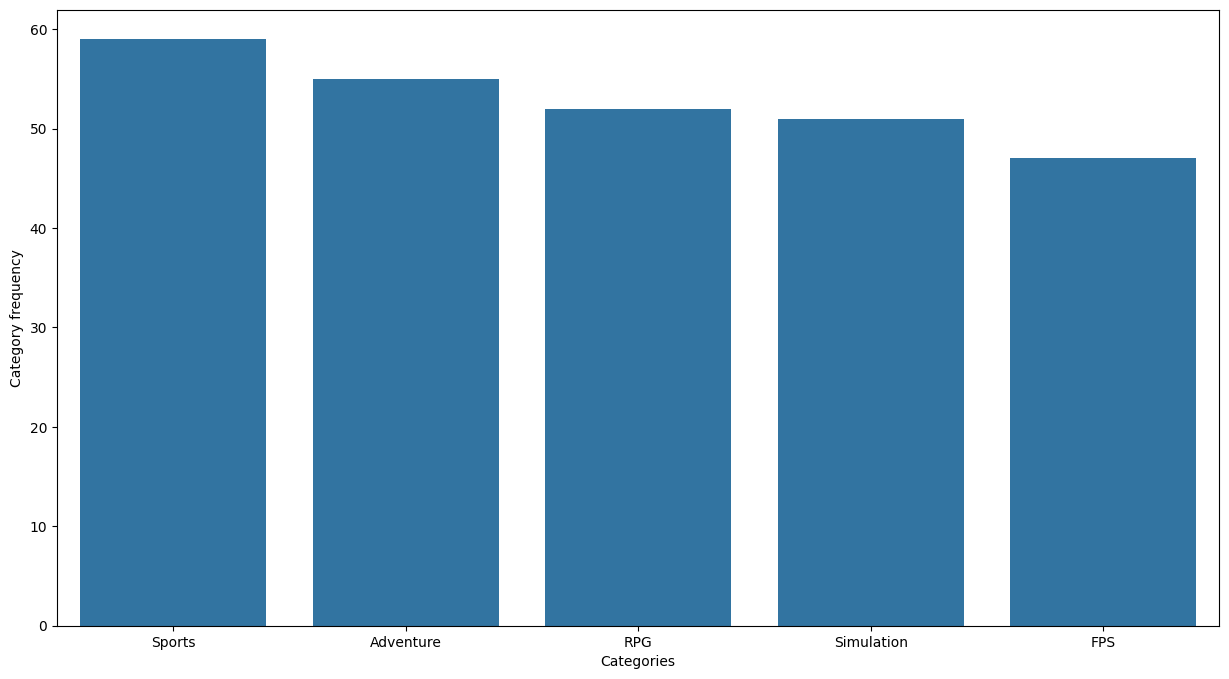

In [403]:
## category count plot

category_order = df["Category"].value_counts().index.tolist()


plt.figure(figsize = (15, 8))


sns.countplot(data = df, x = "Category", order= category_order)

plt.xlabel("Categories")
plt.ylabel("Category frequency")

plt.show(); plt.close()

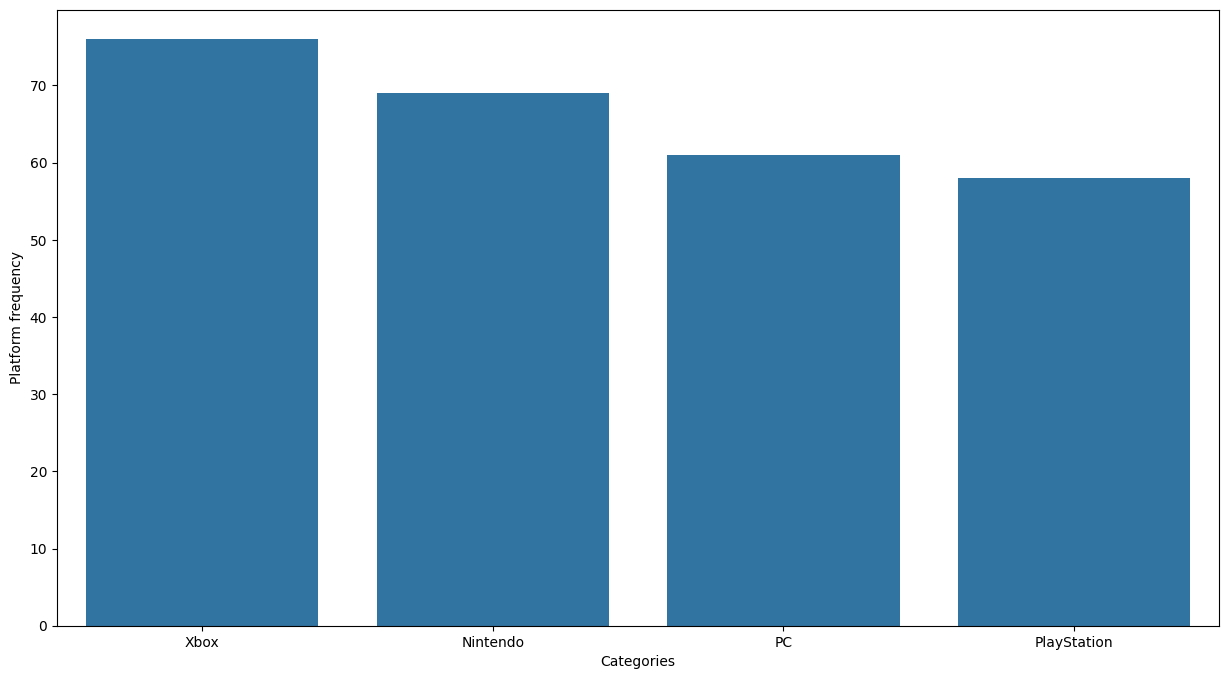

In [404]:
## platform count plot

platform_order = df["Platform"].value_counts().index.tolist()

plt.figure(figsize = (15, 8))

sns.countplot(data = df, x = "Platform", order= platform_order)

plt.xlabel("Categories")
plt.ylabel("Platform frequency")

plt.show(); plt.close()

<Axes: xlabel='Monthly_Sales'>

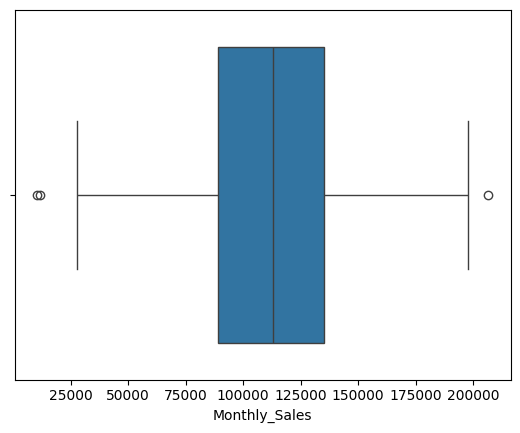

In [405]:
# check for outliers in Monthly Sales
sns.boxplot(x=df["Monthly_Sales"])

## Bivariate Analysis

In [406]:
## Extract month from date column


df["Date"] = pd.to_datetime(df["Date"])
df["Month_Name"] = df["Date"].dt.month_name()

In [407]:
## confirm what we have done above

df.head(5)

,Category,Date,Monthly_Sales,Year,DayOfWeek,Platform,Holiday,Promotion,Month_Name
0,Sports,2002-01-01,108592,2002,1,Xbox,1,0,January
1,RPG,2002-02-01,129387,2002,4,Nintendo,0,0,February
2,Sports,2002-03-01,114777,2002,4,PC,0,0,March
3,Sports,2002-04-01,71738,2002,0,Nintendo,0,0,April
4,Simulation,2002-05-01,142512,2002,2,PlayStation,0,0,May


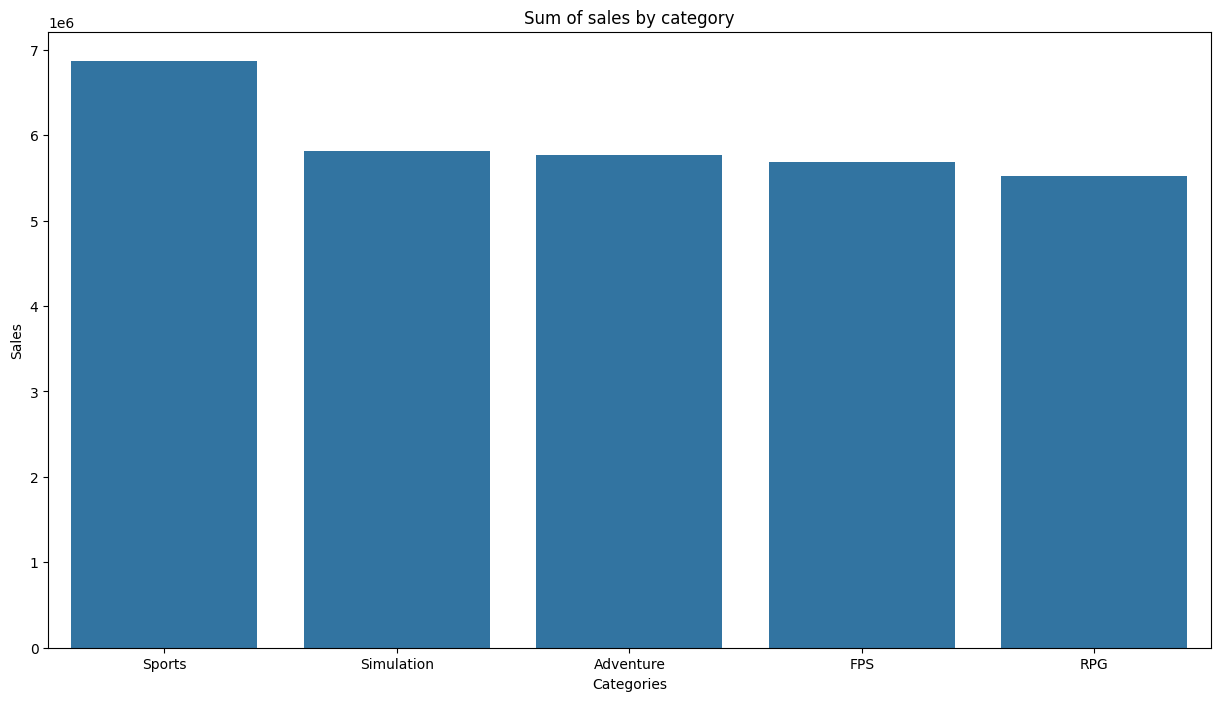

In [408]:
## Sales by category

category_order = df.groupby("Category")["Monthly_Sales"].sum().sort_values(ascending=False).index


plt.figure(figsize = (15, 8))


sns.barplot(data = df, x = "Category", y= "Monthly_Sales", estimator = sum, order = category_order , errorbar=None)

plt.title("Sum of sales by category")
plt.xlabel("Categories")
plt.ylabel("Sales")

plt.show(); plt.close()

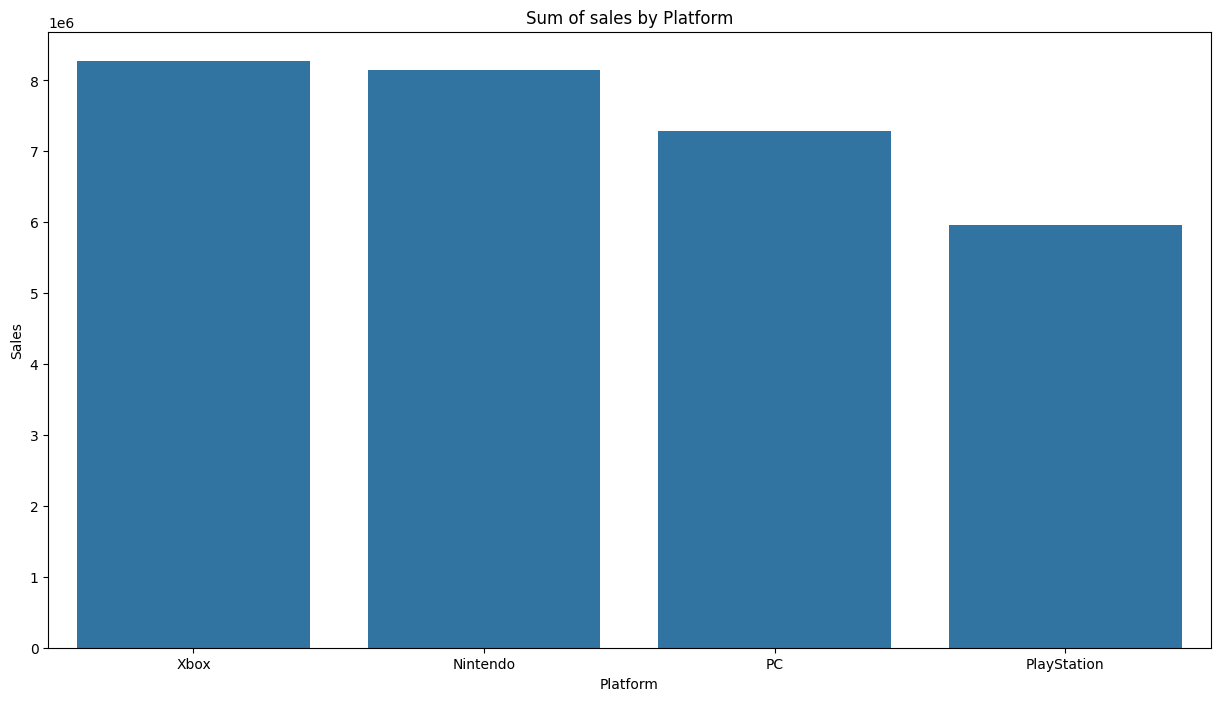

In [409]:
## Sales by platform

category_order = df.groupby("Platform")["Monthly_Sales"].sum().sort_values(ascending=False).index


plt.figure(figsize = (15, 8))


sns.barplot(data = df, x = "Platform", y= "Monthly_Sales", estimator = sum, order = category_order , errorbar=None)

plt.title("Sum of sales by Platform")
plt.xlabel("Platform")
plt.ylabel("Sales")

plt.show(); plt.close()

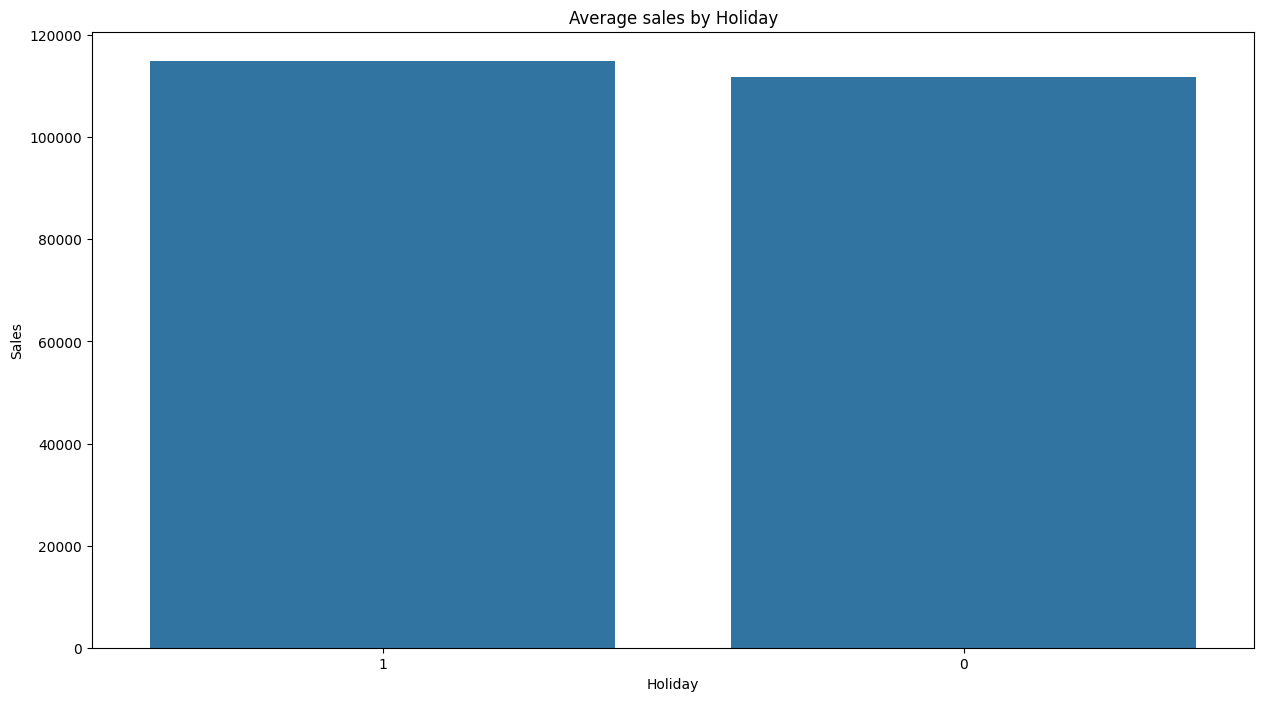

In [410]:
## Sales by Holiday

category_order = df.groupby("Holiday")["Monthly_Sales"].mean().sort_values(ascending=False).index


plt.figure(figsize = (15, 8))


sns.barplot(data = df, x = "Holiday", y= "Monthly_Sales", order = category_order, errorbar=None )

plt.title("Average sales by Holiday")
plt.xlabel("Holiday")
plt.ylabel("Sales")

plt.show(); plt.close()

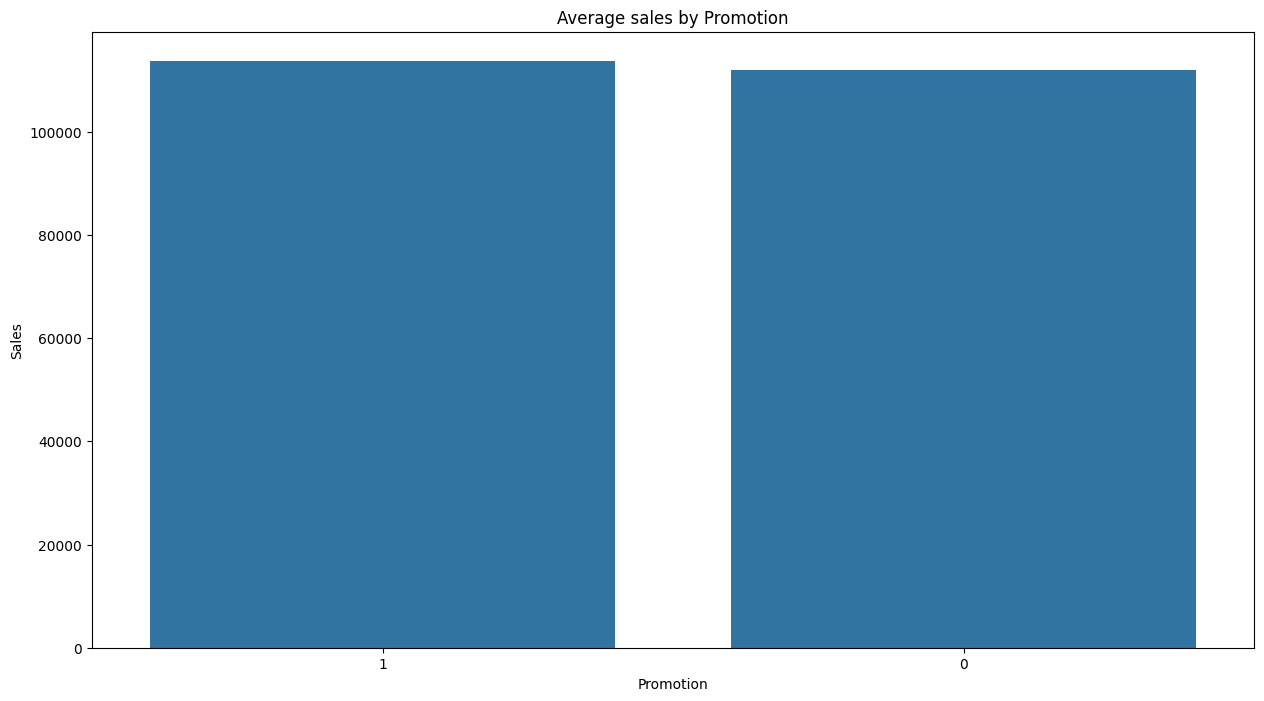

In [411]:
## Sales by Promotion

category_order = df.groupby("Promotion")["Monthly_Sales"].mean().sort_values(ascending=False).index


plt.figure(figsize = (15, 8))


sns.barplot(data = df, x = "Promotion", y= "Monthly_Sales", order = category_order , errorbar=None)

plt.title("Average sales by Promotion")
plt.xlabel("Promotion")
plt.ylabel("Sales")

plt.show(); plt.close()

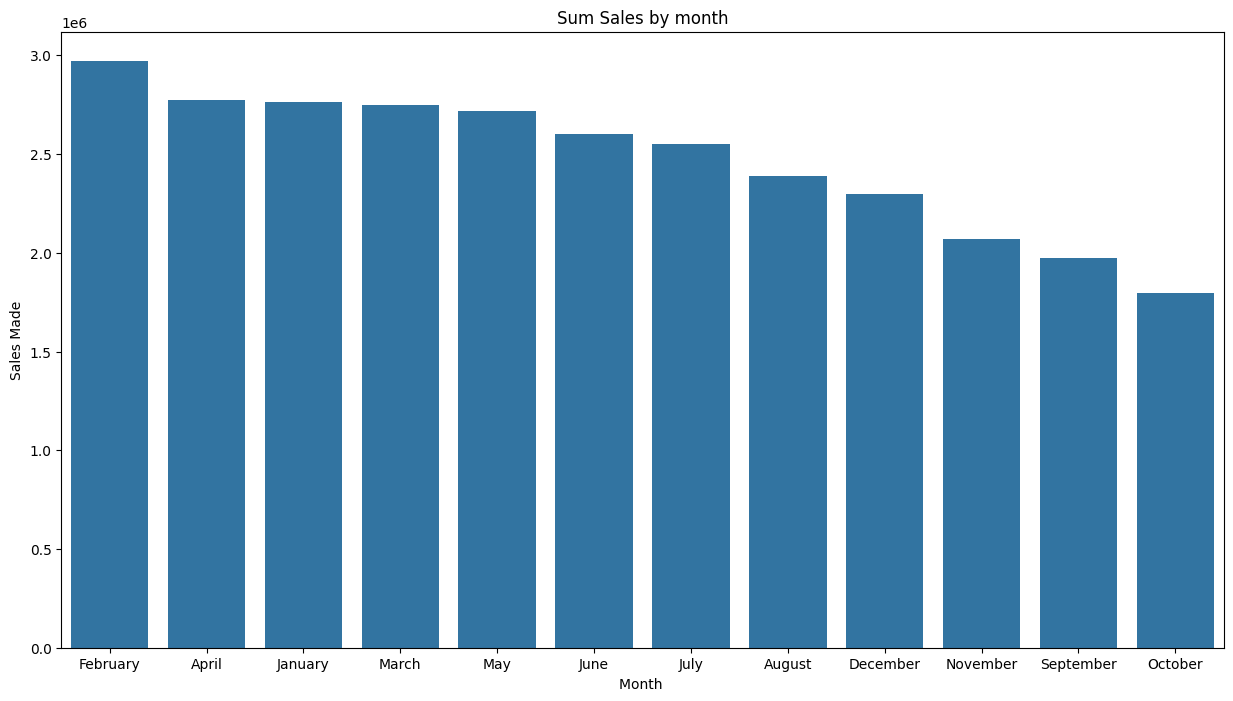

In [412]:
## visualize sales by month

category_order = df.groupby("Month_Name")["Monthly_Sales"].sum().sort_values(ascending=False).index

plt.figure(figsize = (15, 8))

sns.barplot(data = df, x = "Month_Name", y = "Monthly_Sales", estimator = sum, order = category_order, errorbar=None)

plt.title("Sum Sales by month")
plt.xlabel("Month ")
plt.ylabel("Sales Made")

plt.show()

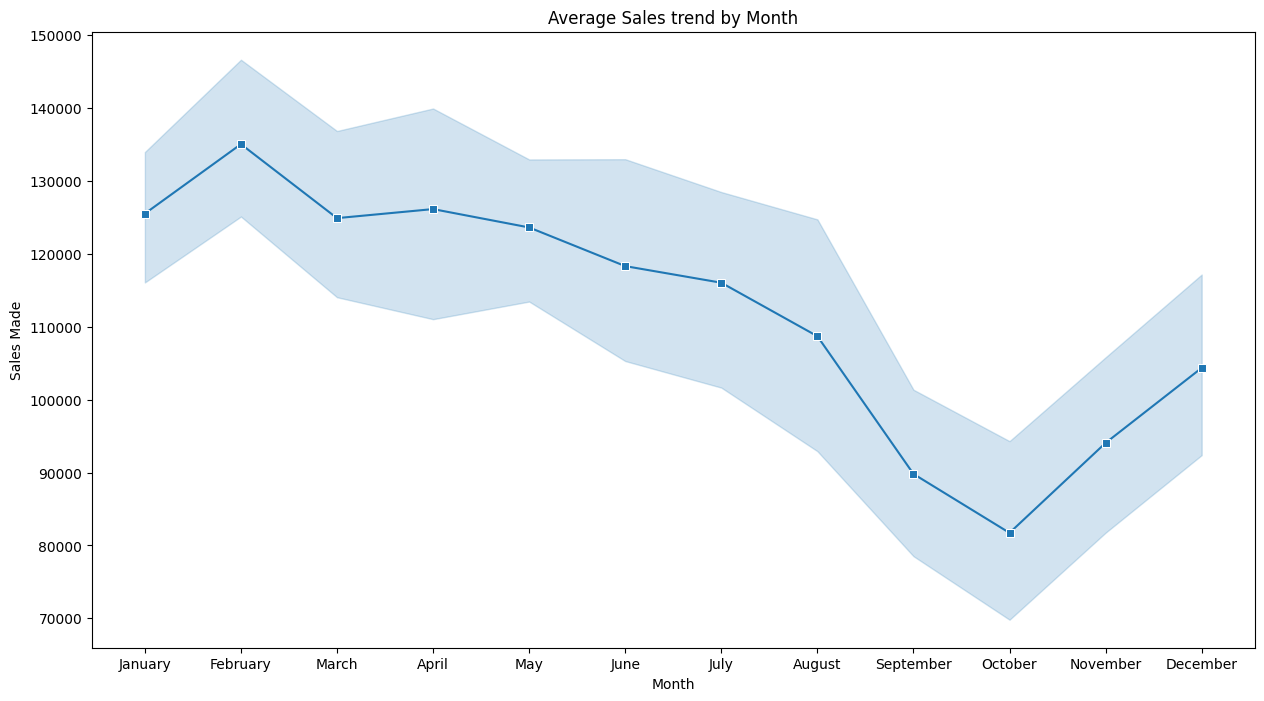

In [413]:
## visualize sales trend by Month

plt.figure(figsize = (15, 8))

sns.lineplot(data = df, x = "Month_Name", y = "Monthly_Sales", marker = "s")

plt.title("Average Sales trend by Month")
plt.xlabel("Month")
plt.ylabel("Sales Made")

plt.show(); plt.close()

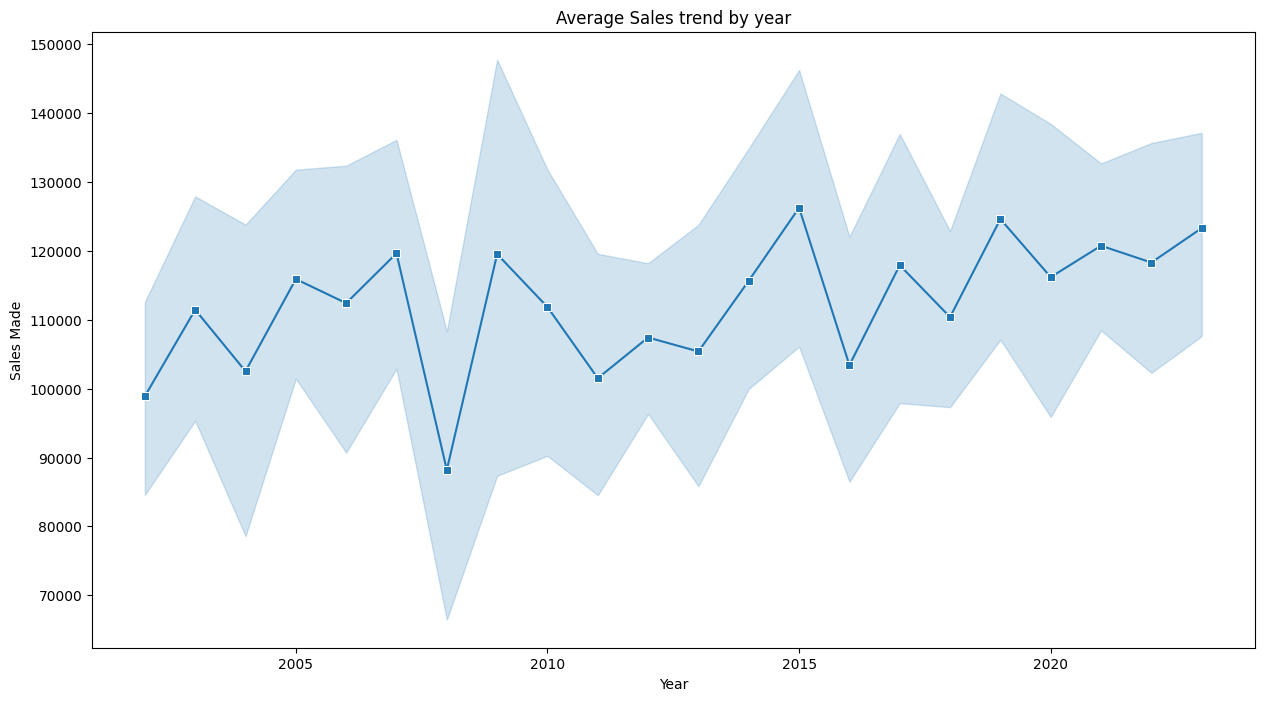

In [414]:
## visualize sales trend by year

plt.figure(figsize = (15, 8))

sns.lineplot(data = df, x = "Year", y = "Monthly_Sales", marker = "s")

plt.title("Average Sales trend by year")
plt.xlabel("Year")
plt.ylabel("Sales Made")

plt.show(); plt.close()

In [415]:
## create a new feature called month_year

df['Month_Year'] = df['Month_Name'] + ' ' + df['Year'].astype(str)
df.head(2)

,Category,Date,Monthly_Sales,Year,DayOfWeek,Platform,Holiday,Promotion,Month_Name,Month_Year
0,Sports,2002-01-01,108592,2002,1,Xbox,1,0,January,January 2002
1,RPG,2002-02-01,129387,2002,4,Nintendo,0,0,February,February 2002


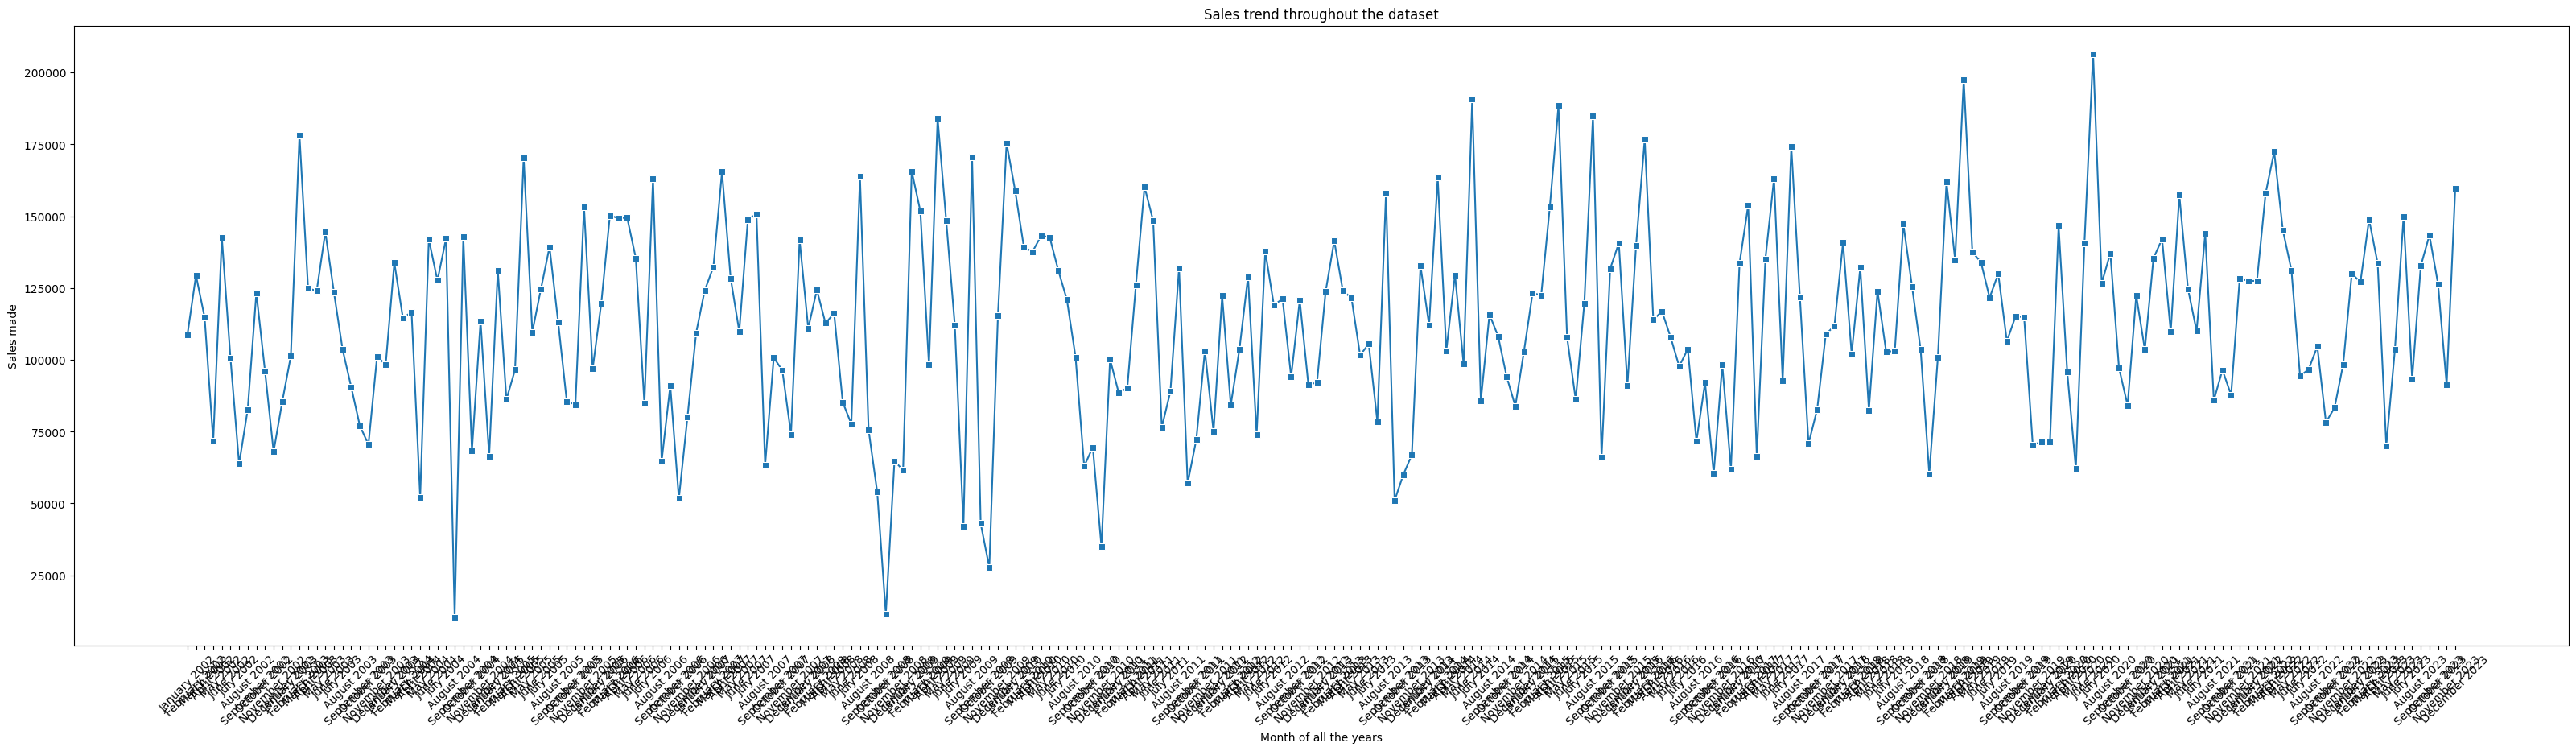

In [416]:
## visualize sales trend by month throughout the years in the dataset



plt.figure(figsize = (40, 10))

sns.lineplot(data = df, x= "Month_Year", y= "Monthly_Sales", marker= "s")

plt.title("Sales trend throughout the dataset")
plt.xlabel("Month of all the years")
plt.ylabel("Sales made")
plt.xticks(rotation = 45)

plt.show(); plt.close()

In [417]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

In [418]:
## set month as the dataset index for time series operation
df.set_index('Date', inplace=True)

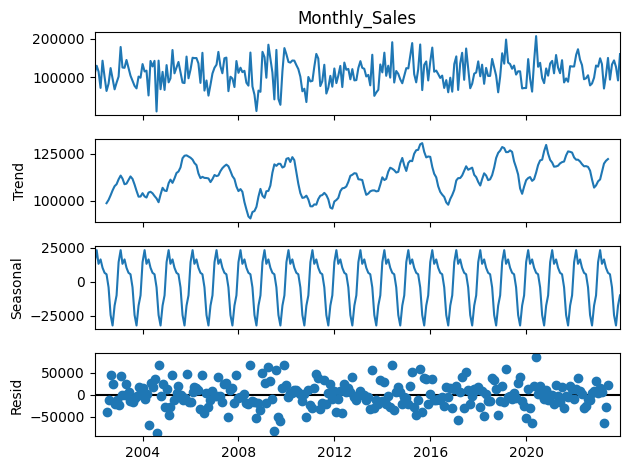

In [419]:
## Visualize seasonal decomposition

decomposition = seasonal_decompose(df['Monthly_Sales'], model='additive', period=12)
fig = decomposition.plot()
plt.show()


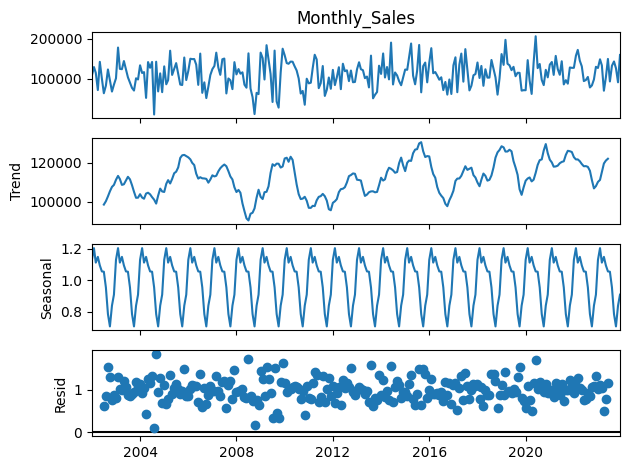

In [420]:
## Visualize seasonal decomposition

decomposition = seasonal_decompose(df['Monthly_Sales'], model='multiply', period=12)
fig = decomposition.plot()
plt.show()

In [421]:
# Trend, Seasonal, and Residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

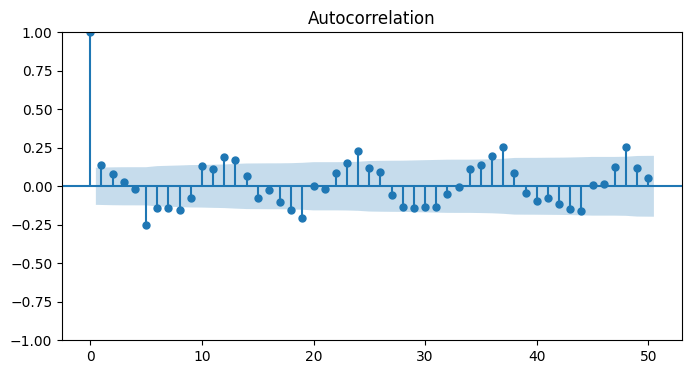

In [422]:
## Autocorrelation Plot 
fig, ax = plt.subplots(figsize=(8,4))
plot_acf(df['Monthly_Sales'], ax=ax, lags=50)
plt.show()

In [423]:
# Extract month name from the DateTimeIndex
seasonal_df = df.copy()

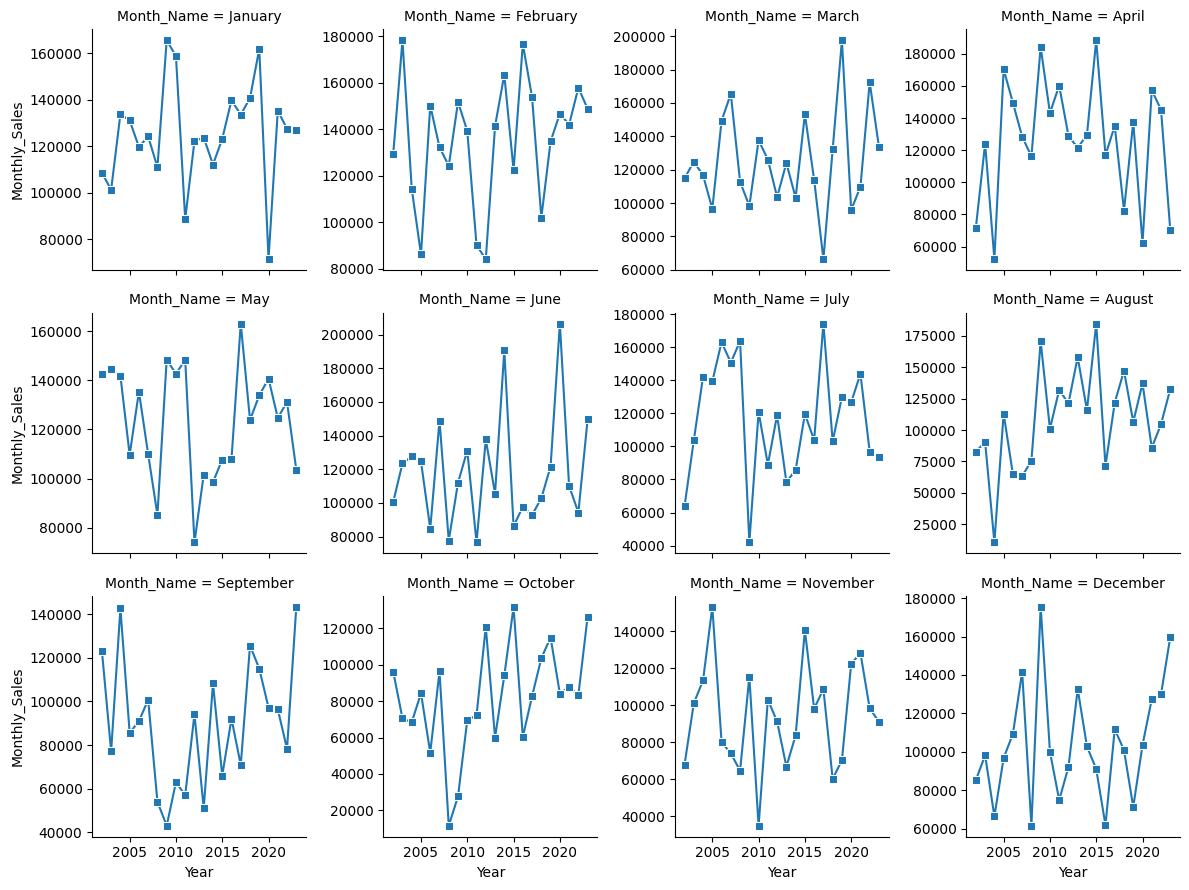

In [424]:
# Create a facet grid of line plots, one per month, showing values across years
g = sns.FacetGrid(seasonal_df, col='Month_Name', col_wrap=4, sharey=False)
g.map(sns.lineplot, 'Year', 'Monthly_Sales', marker = "s")
plt.show()


## Multivariate Analysis


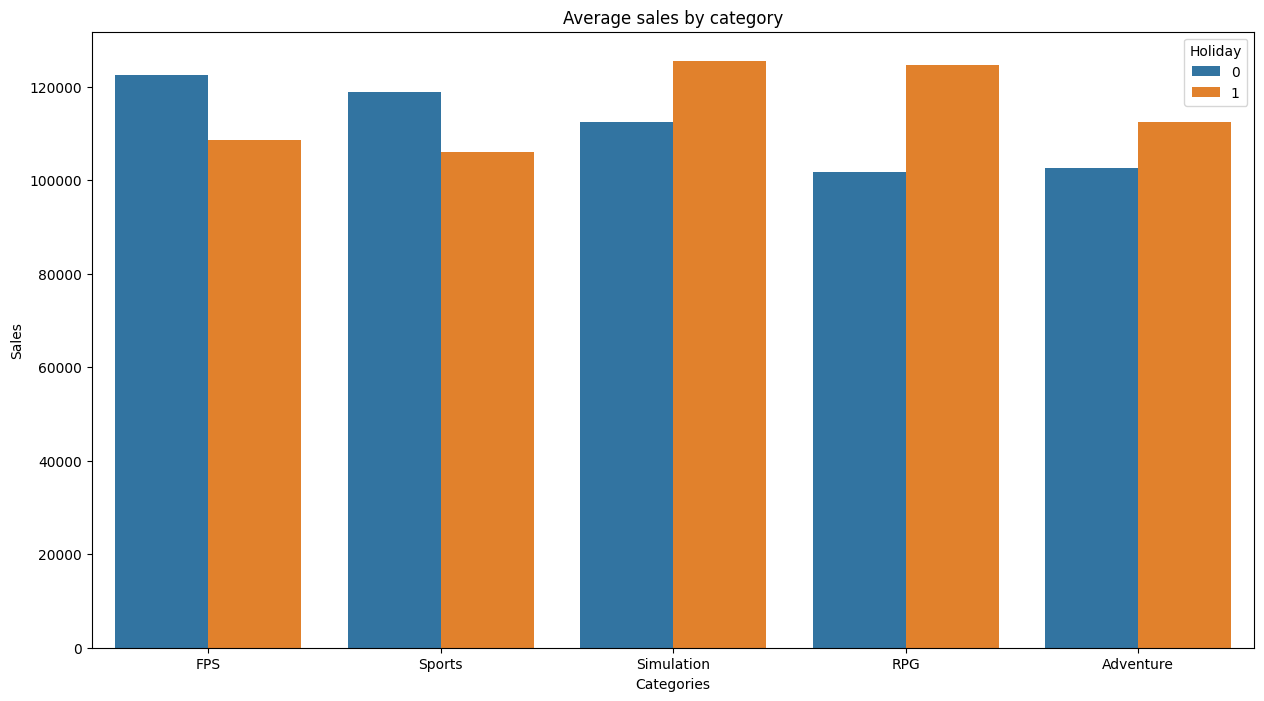

In [425]:
## Sales by category against Holiday

category_order = df.groupby("Category")["Monthly_Sales"].mean().sort_values(ascending=False).index


plt.figure(figsize = (15, 8))


sns.barplot(data = df, x = "Category", y= "Monthly_Sales", hue= "Holiday", order = category_order , errorbar=None)

plt.title("Average sales by category")
plt.xlabel("Categories")
plt.ylabel("Sales")

plt.show(); plt.close()

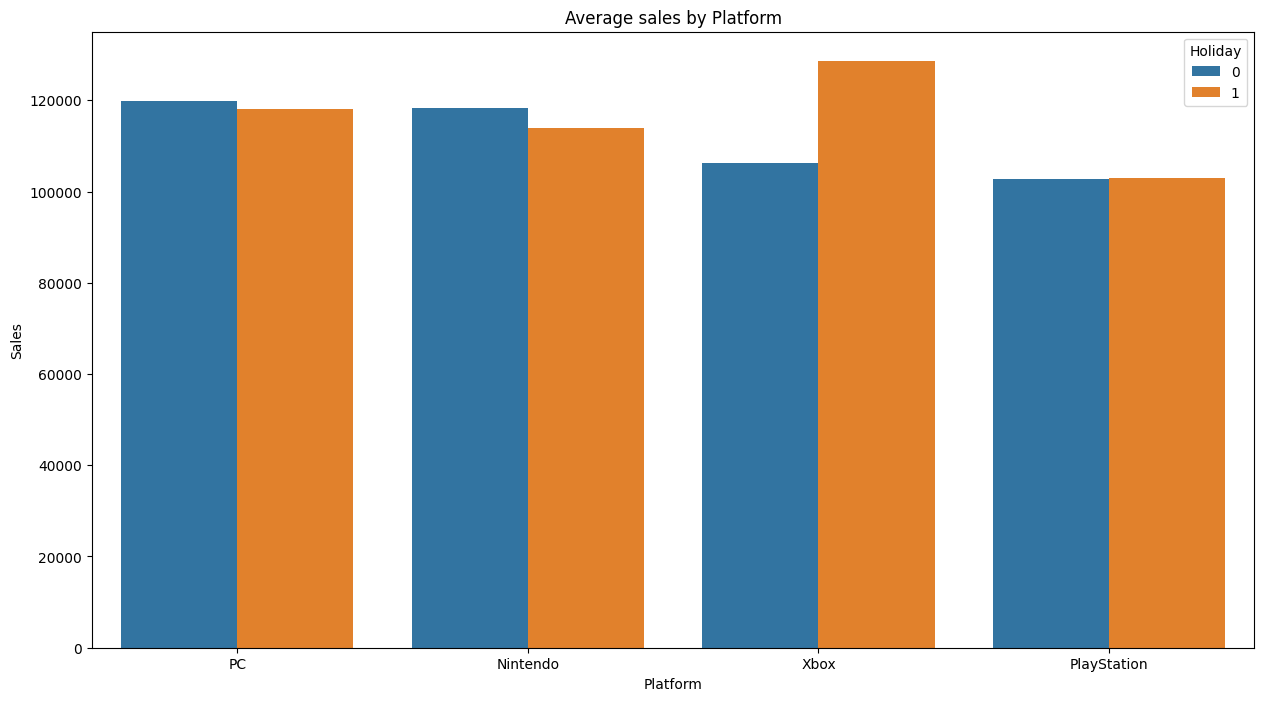

In [426]:
## Sales by platform against Holiday

category_order = df.groupby("Platform")["Monthly_Sales"].mean().sort_values(ascending=False).index


plt.figure(figsize = (15, 8))


sns.barplot(data = df, x = "Platform", y= "Monthly_Sales", hue= "Holiday", order = category_order , errorbar=None)

plt.title("Average sales by Platform")
plt.xlabel("Platform")
plt.ylabel("Sales")

plt.show(); plt.close()

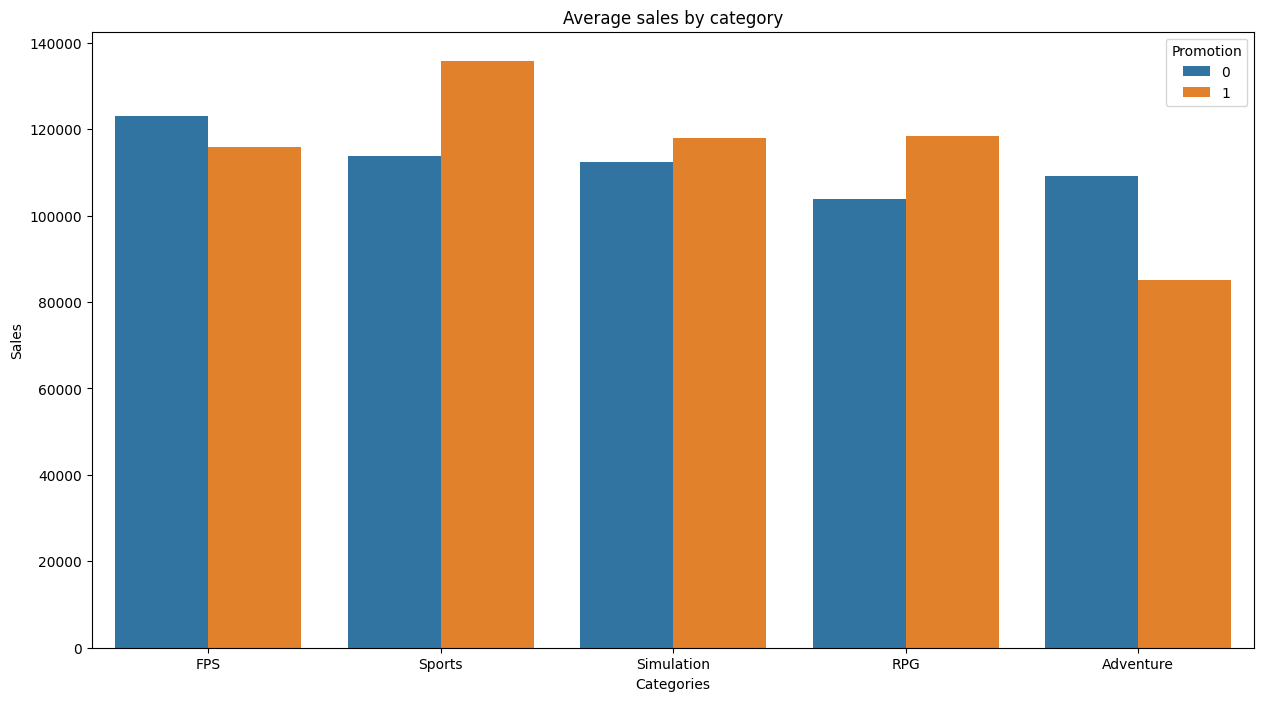

In [427]:
## Sales by category against Promotion

category_order = df.groupby("Category")["Monthly_Sales"].mean().sort_values(ascending=False).index


plt.figure(figsize = (15, 8))


sns.barplot(data = df, x = "Category", y= "Monthly_Sales", hue= "Promotion", order = category_order , errorbar=None)

plt.title("Average sales by category")
plt.xlabel("Categories")
plt.ylabel("Sales")

plt.show(); plt.close()

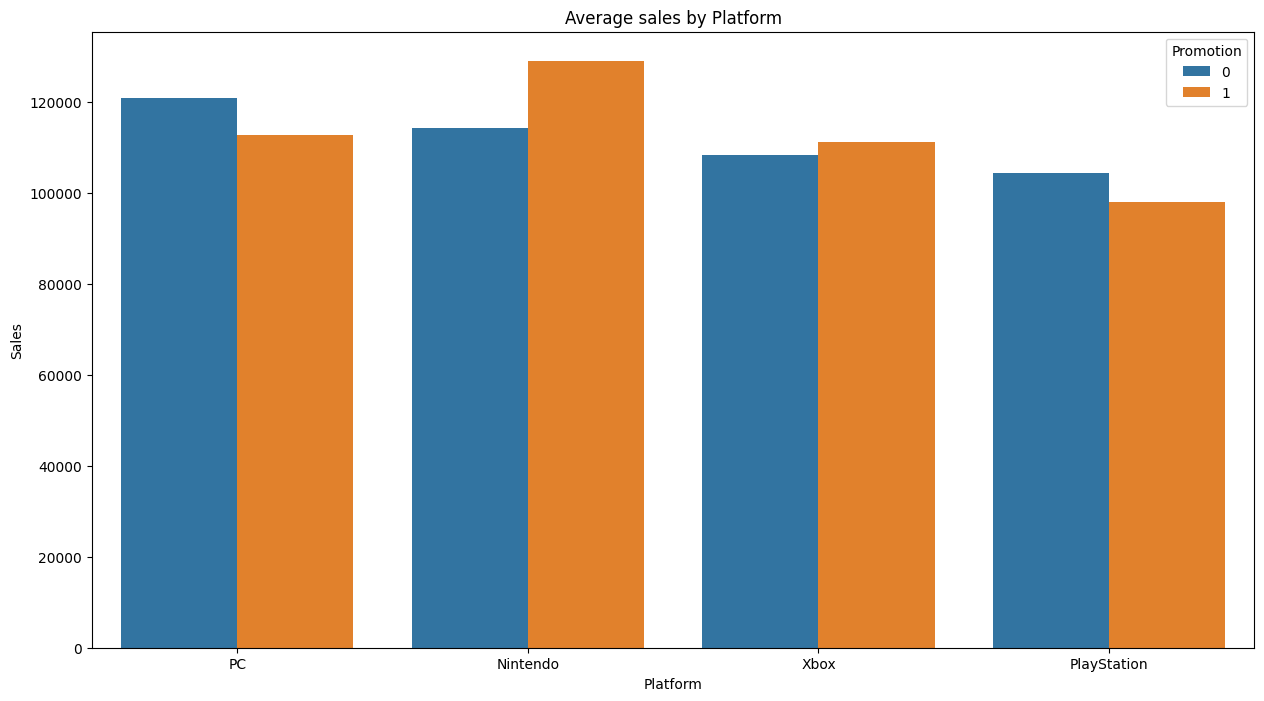

In [428]:
## Sales by platform against Promotion

category_order = df.groupby("Platform")["Monthly_Sales"].mean().sort_values(ascending=False).index


plt.figure(figsize = (15, 8))


sns.barplot(data = df, x = "Platform", y= "Monthly_Sales", hue= "Promotion", order = category_order , errorbar=None)

plt.title("Average sales by Platform")
plt.xlabel("Platform")
plt.ylabel("Sales")

plt.show(); plt.close()

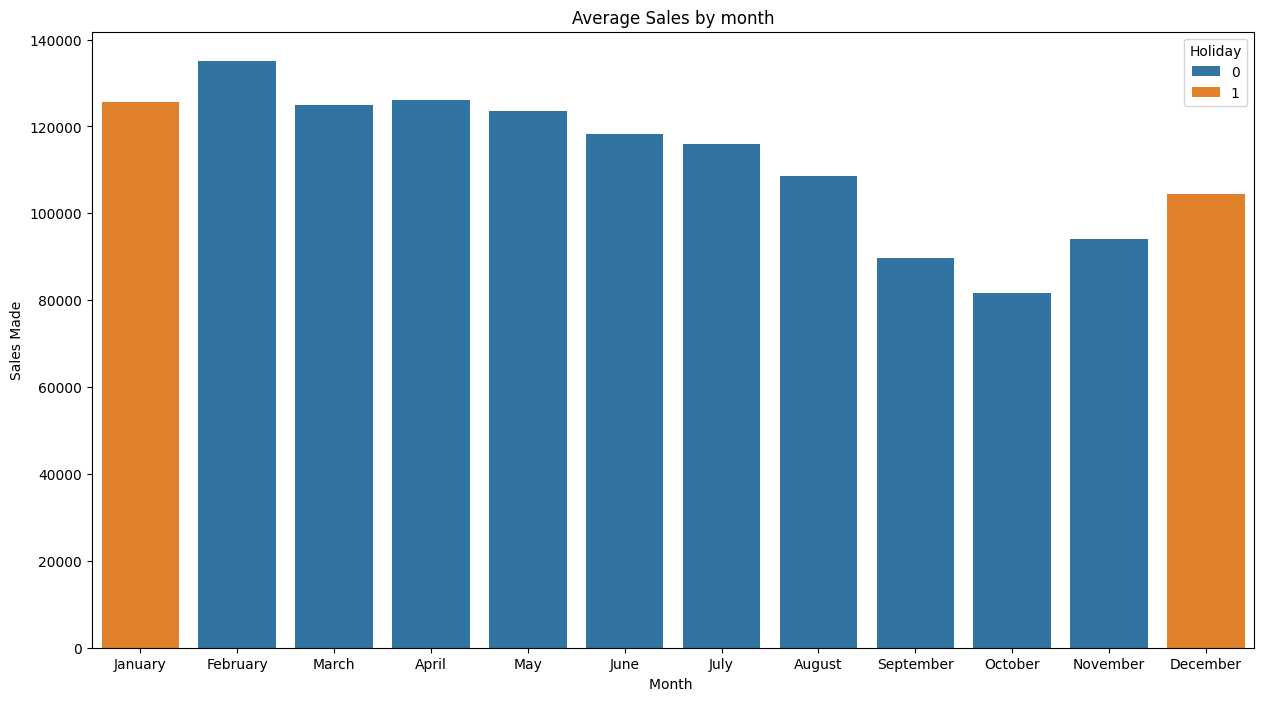

In [429]:
## Average sales by month hue Holiday

#category_order = df.groupby("Month_Name")["Monthly_Sales"].mean().sort_values(ascending=False).index

plt.figure(figsize = (15, 8))

sns.barplot(data = df, x = "Month_Name", y = "Monthly_Sales", hue= "Holiday", errorbar=None)

plt.title("Average Sales by month")
plt.xlabel("Month ")
plt.ylabel("Sales Made")

plt.show()

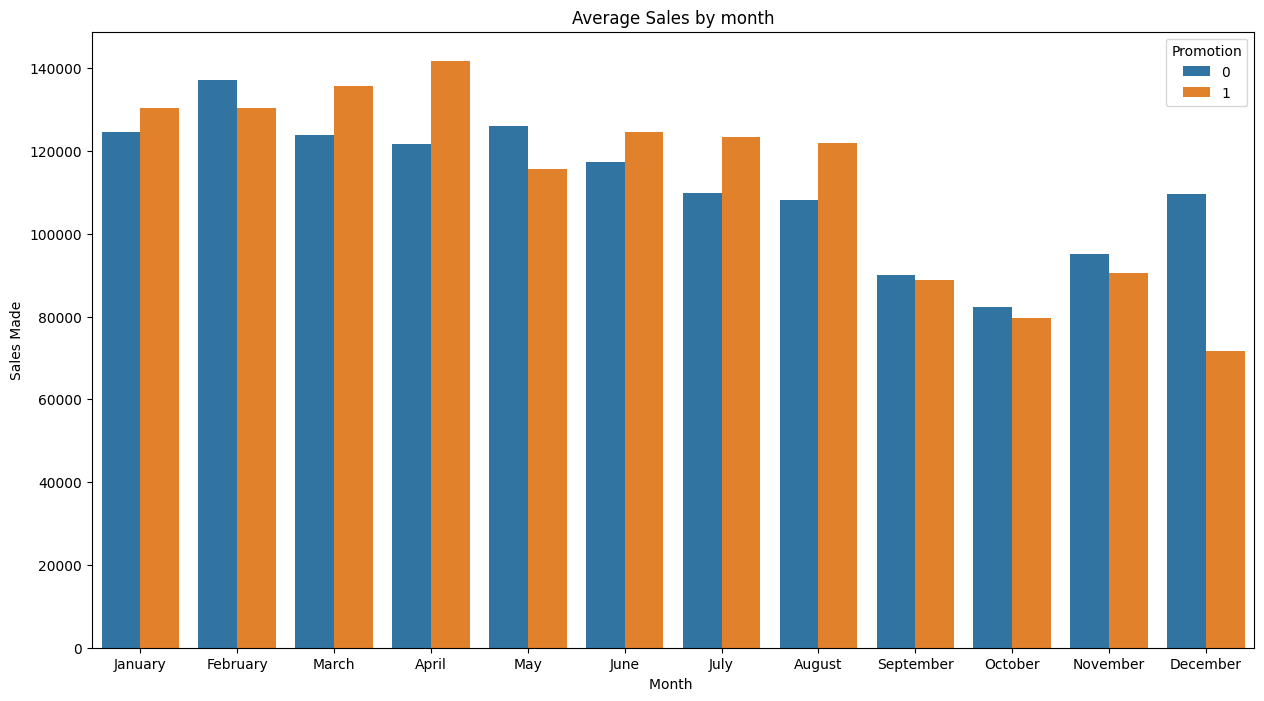

In [430]:
## Average sales by month hue Promotion

#category_order = df.groupby("Month_Name")["Monthly_Sales"].mean().sort_values(ascending=False).index

plt.figure(figsize = (15, 8))

sns.barplot(data = df, x = "Month_Name", y = "Monthly_Sales", hue= "Promotion", errorbar=None)

plt.title("Average Sales by month")
plt.xlabel("Month ")
plt.ylabel("Sales Made")

plt.show()

In [431]:
df.head(5)

,Category,Monthly_Sales,Year,DayOfWeek,Platform,Holiday,Promotion,Month_Name,Month_Year
Date,,,,,,,,,
2002-01-01,Sports,108592,2002,1,Xbox,1,0,January,January 2002
2002-02-01,RPG,129387,2002,4,Nintendo,0,0,February,February 2002
2002-03-01,Sports,114777,2002,4,PC,0,0,March,March 2002
2002-04-01,Sports,71738,2002,0,Nintendo,0,0,April,April 2002
2002-05-01,Simulation,142512,2002,2,PlayStation,0,0,May,May 2002
